### Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
%run ..//..//Library//MapeExtended_Library.ipynb 

### Functions

In [3]:
def mape_score(y_real, y_predict):
    return np.mean(np.abs((y_real - y_predict)/y_real))*100

### Load data

In [4]:
diabetes = load_diabetes()

# Initializing the dataframe
data = pd.DataFrame(diabetes.data)

#Adding the feature names to the dataframe
data.columns = diabetes.feature_names

In [5]:
#Adding target variable to dataframe
data['diabetes'] = diabetes.target 

In [6]:
# Spliting target variable and independent variables
X = data.drop(['diabetes'], axis = 1)
y = data['diabetes']

In [7]:
# features with symbolic transoformation
# X = pd.read_csv("newBoston.csv")

In [8]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fit model

In [41]:
model = SVR_mapext(kernel = "rbf", C = 6.412259, epsilon = 1.1, gamma = 0.053517, lamda = 0.057786)

In [42]:
fitted = model.fit(X_train,y_train)

In [43]:
predict = fitted.predict(X_train)
forecast = fitted.predict(X_test)

### Metric

In [44]:
## R2 
r2_train = metrics.r2_score(y_train, predict) 
r2_test = metrics.r2_score(y_test, forecast)
print(f"R2_train: {r2_train:.4}, \nR2_test: {r2_test:.4}")

R2_train: 0.8696, 
R2_test: 0.8587


In [45]:
mape_train = mape_score(y_train, predict)
mape_test = mape_score(y_test, forecast)
print(f"MAPE_train: {mape_train:.4}, \nMAPE_test: {mape_test:.4}")

MAPE_train: 7.629, 
MAPE_test: 10.97


In [46]:
mse_train = metrics.mean_squared_error(y_train, predict) 
mse_test = metrics.mean_squared_error(y_test, forecast)
print(f"MSE_train: {mse_train:.4}, \nMSE_test: {mse_test:.4}")

MSE_train: 9.817, 
MSE_test: 14.76


### Plots

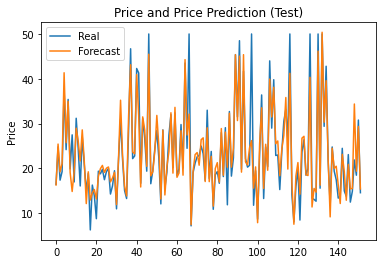

In [47]:
plt.title("Price and Price Prediction (Test)")
plt.plot(y_test.to_numpy(), label = "Real")
plt.plot(forecast, label = "Forecast")
plt.ylabel("Price")
plt.legend();

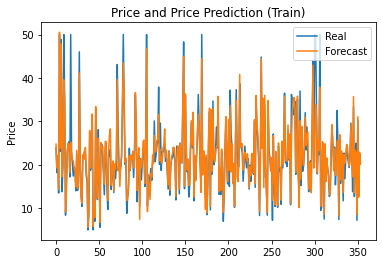

In [48]:
plt.title("Price and Price Prediction (Train)")
plt.plot(y_train.to_numpy(), label = "Real")
plt.plot(predict, label = "Forecast")
plt.ylabel("Price")
plt.legend();